## libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.drop([3], axis =0, inplace = True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
test.shape

(1459, 80)

In [7]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Looking at the train data missing values.

##### train missing values

In [8]:
NANColumns=[]
i=-1
for a in train.isnull().sum():
    i+=1
    if a!=0:
        print(train.columns[i],a)
        NANColumns.append(train.columns[i])

LotFrontage 259
Alley 1368
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1452
Fence 1178
MiscFeature 1405


##### train missing values

In [9]:
NANColumns=[]
i=-1
for a in test.isnull().sum():
    i+=1
    if a!=0:
        print(test.columns[i],a)
        NANColumns.append(test.columns[i])

MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


### Salse target

C:\Users\mosae\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

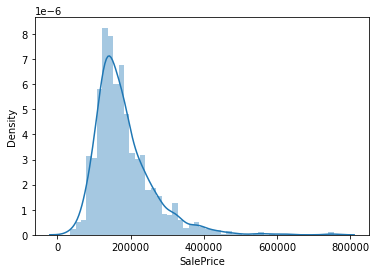

In [10]:
 sb.distplot(train['SalePrice'])

## All featuresof train data

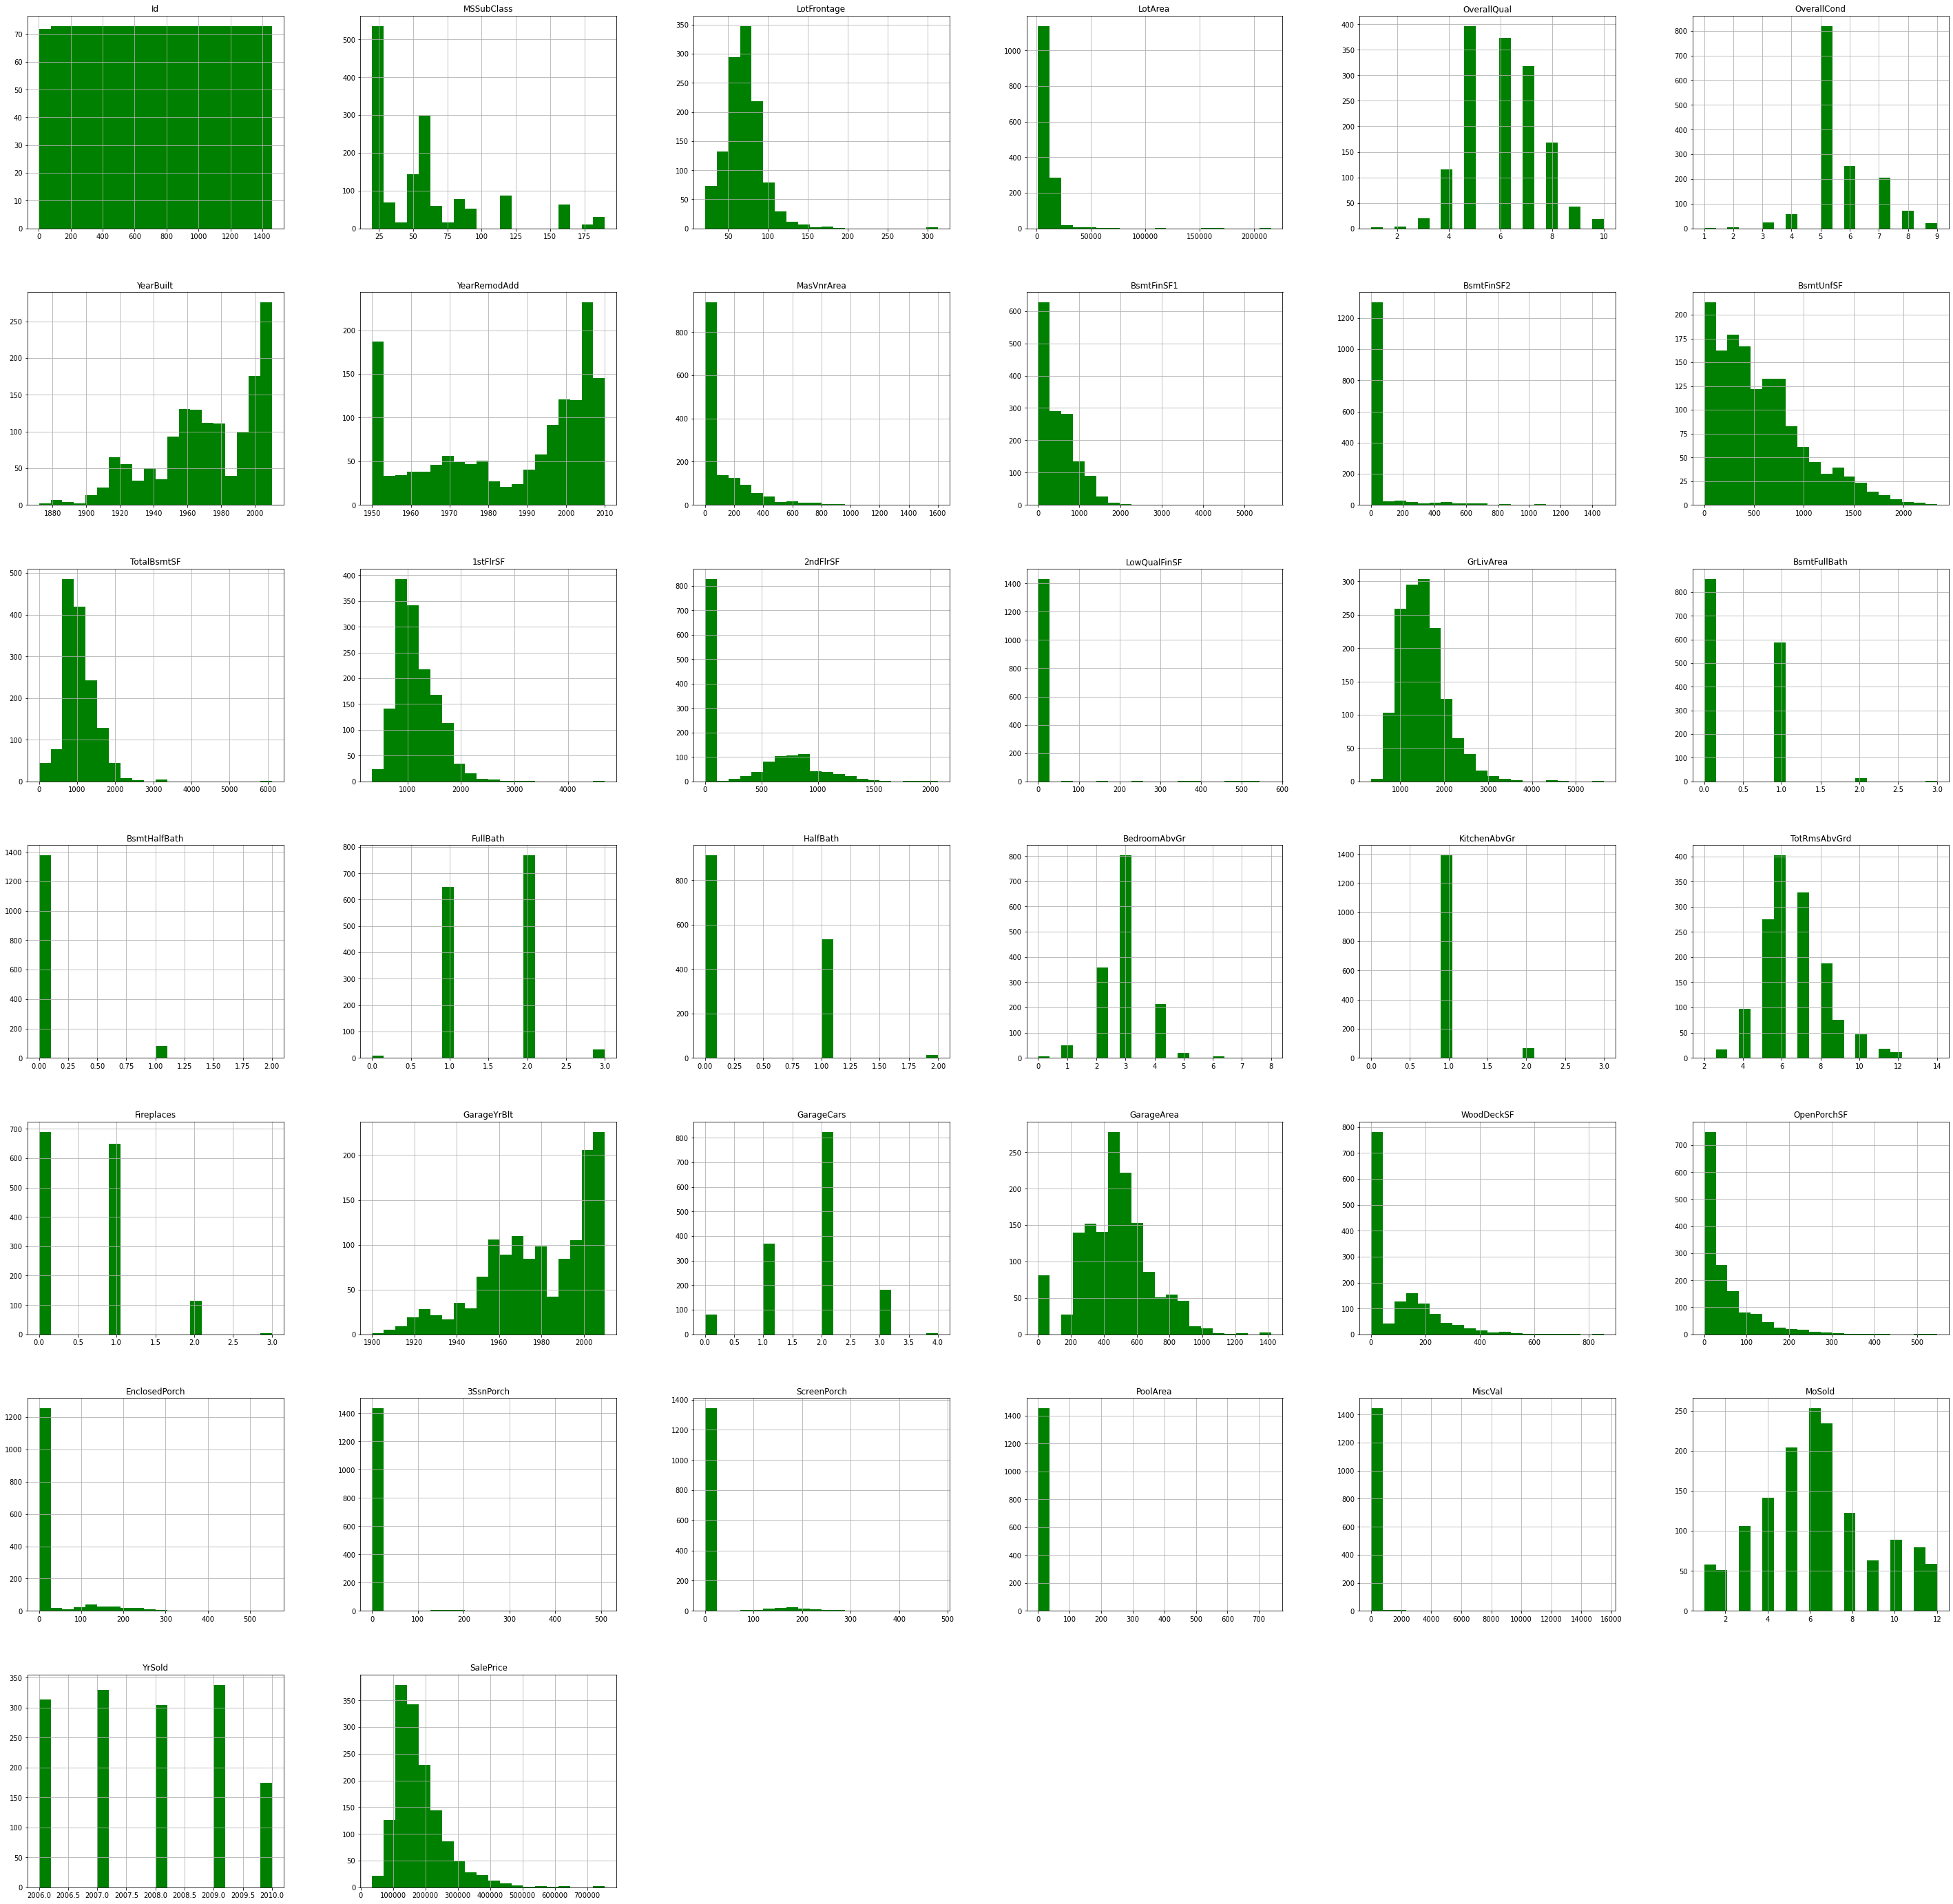

In [11]:
train.hist(figsize=(50,50),bins = 20, color="green")
plt.title("Features Distribution")
plt.show()

### Temporal Data

In [12]:
temporal_features = [ a for a in train if "Year" in a or "Yr" in a]
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

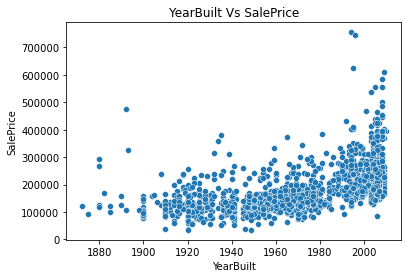

In [13]:
sb.scatterplot(x=train["YearBuilt"],y=train["SalePrice"])
plt.title('YearBuilt Vs SalePrice')
plt.show()

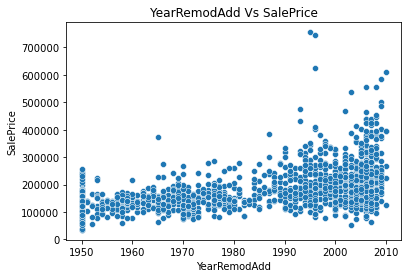

In [14]:
sb.scatterplot(x=train["YearRemodAdd"],y=train["SalePrice"])
plt.title('YearRemodAdd Vs SalePrice')
plt.show()

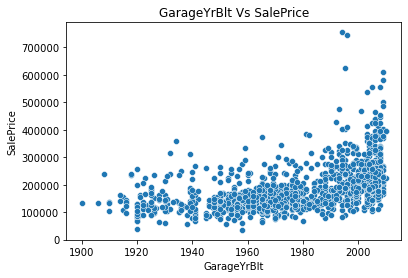

In [15]:
sb.scatterplot(x=train["GarageYrBlt"],y=train["SalePrice"])
plt.title('GarageYrBlt Vs SalePrice')
plt.show()

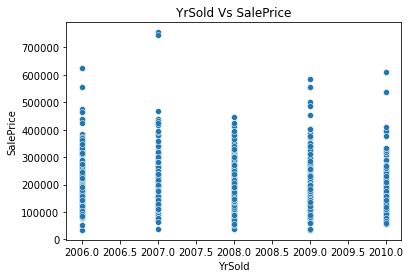

In [16]:
sb.scatterplot(x=train["YrSold"],y=train["SalePrice"])
plt.title('YrSold Vs SalePrice')
plt.show()

#### Heatmap to see the what are the most important features that affect home prices

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

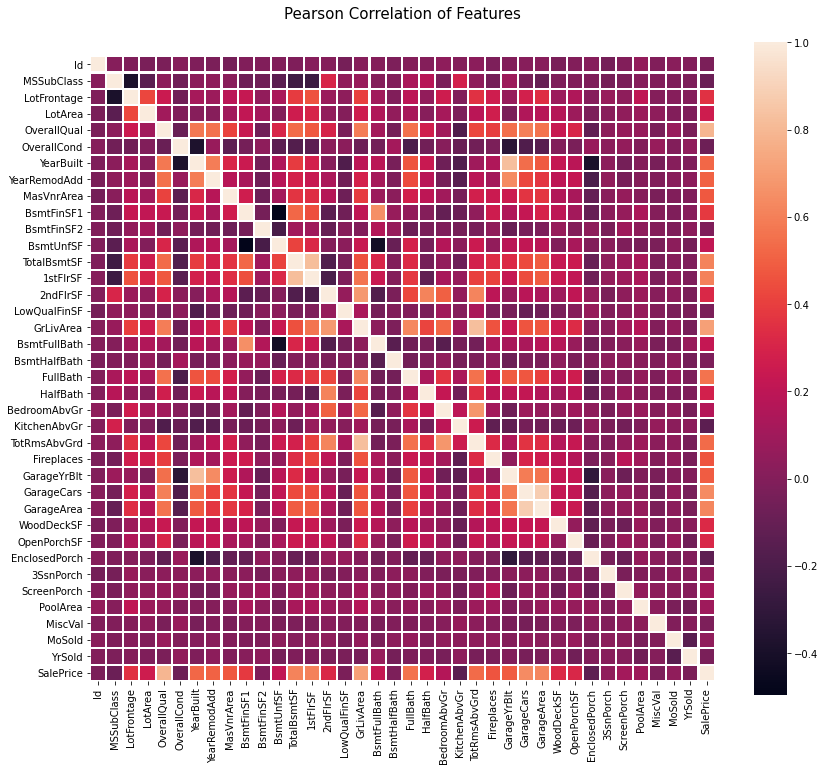

In [17]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(train.corr(),linewidths=1.1,vmax=1.0, 
            square=True, linecolor='white')

<AxesSubplot:>

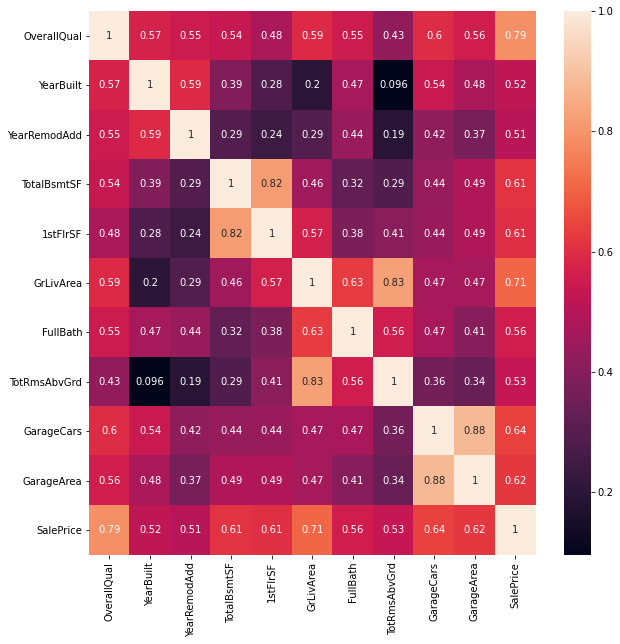

In [18]:
corr = train.corr()
highest_corr_feature = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
sb.heatmap(train[highest_corr_feature].corr(),annot=True)

In [19]:
corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.791399
GrLivArea        0.708860
GarageCars       0.641650
GarageArea       0.623901
TotalBsmtSF      0.613493
1stFlrSF         0.605780
FullBath         0.560555
TotRmsAbvGrd     0.533893
YearBuilt        0.522909
YearRemodAdd     0.506983
GarageYrBlt      0.486860
MasVnrArea       0.477388
Fireplaces       0.467241
BsmtFinSF1       0.386312
LotFrontage      0.351691
WoodDeckSF       0.324240
2ndFlrSF         0.319790
OpenPorchSF      0.315826
HalfBath         0.283921
LotArea          0.263834
BsmtFullBath     0.227630
BsmtUnfSF        0.214477
BedroomAbvGr     0.168288
ScreenPorch      0.111364
PoolArea         0.092388
MoSold           0.045912
3SsnPorch        0.044547
BsmtFinSF2      -0.011481
BsmtHalfBath    -0.016931
MiscVal         -0.021223
Id              -0.022551
LowQualFinSF    -0.025651
YrSold          -0.029427
OverallCond     -0.078053
MSSubClass      -0.084185
EnclosedPorch   -0.127880
KitchenAbvGr    -0.135997
Name: SalePr

### these are the features with highest correlation.

In [20]:
all_data = pd.concat([train, test], axis=0, sort=False)

In [21]:
y_train = train['SalePrice']
test_id = test['Id']

In [22]:
all_data = pd.concat([train, test], axis=0, sort=False)
all_data = all_data.drop(['Id', 'SalePrice'], axis=1)

In [23]:
Total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum() / all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,2908,0.996573
MiscFeature,2813,0.964016
Alley,2720,0.932145
Fence,2347,0.804318
FireplaceQu,1420,0.486635
LotFrontage,486,0.166552
GarageCond,159,0.054489
GarageQual,159,0.054489
GarageYrBlt,159,0.054489
GarageFinish,159,0.054489


Well, if we look at these features that have many missing values, we will note that they are not important features, none of them has (correlation > 0.5), so if we delete them we will not miss the data

In [24]:
all_data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
print(all_data.isnull().sum().max())

4


In [25]:
total = all_data.isnull().sum().sort_values(ascending=False)
total.head(25)

MSZoning         4
BsmtHalfBath     2
BsmtFullBath     2
Functional       2
Utilities        2
Exterior1st      1
KitchenQual      1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
Exterior2nd      1
SaleType         1
TotalBsmtSF      1
BsmtUnfSF        1
BsmtFinSF2       1
Electrical       1
YearBuilt        0
ExterQual        0
RoofMatl         0
RoofStyle        0
YearRemodAdd     0
SaleCondition    0
OverallCond      0
OverallQual      0
ExterCond        0
dtype: int64

In [26]:
# filling the numeric data
numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

for feature in numeric_missed:
    all_data[feature] = all_data[feature].fillna(0)

In [27]:
#filling categorical data
categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual']

for feature in categorical_missed:
    all_data[feature] = all_data[feature].fillna(all_data[feature].mode()[0])

In [28]:
all_data['Functional'] = all_data['Functional'].fillna('Typ', inplace =True)

In [29]:
all_data.drop(['Utilities'], axis=1, inplace=True)

In [30]:
all_data.isnull().sum()

MSSubClass          0
MSZoning            0
LotArea             0
Street              0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional       2918
Fireplaces

In [31]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2918 non-null   int64  
 1   MSZoning       2918 non-null   object 
 2   LotArea        2918 non-null   int64  
 3   Street         2918 non-null   object 
 4   LotShape       2918 non-null   object 
 5   LandContour    2918 non-null   object 
 6   LotConfig      2918 non-null   object 
 7   LandSlope      2918 non-null   object 
 8   Neighborhood   2918 non-null   object 
 9   Condition1     2918 non-null   object 
 10  Condition2     2918 non-null   object 
 11  BldgType       2918 non-null   object 
 12  HouseStyle     2918 non-null   object 
 13  OverallQual    2918 non-null   int64  
 14  OverallCond    2918 non-null   int64  
 15  YearBuilt      2918 non-null   int64  
 16  YearRemodAdd   2918 non-null   int64  
 17  RoofStyle      2918 non-null   object 
 18  RoofMatl

In [32]:
all_data = pd.get_dummies(all_data)
all_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
4,60,14260,8,5,2000,2000,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0
5,50,14115,5,5,1993,1995,732.0,0.0,64.0,796.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,1894,4,5,1970,1970,252.0,0.0,294.0,546.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,20000,5,7,1960,1996,1224.0,0.0,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,...,0,0,0,1,0,0,0,0,1,0


In [33]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Columns: 211 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(8), int64(25), uint8(178)
memory usage: 1.3 MB


### Split data

In [34]:
n = len(y_train)
X_train = all_data[:n]
X_test = all_data[:n]

In [35]:
y_train.shape

(1459,)

In [36]:
print("Shapes of data: ", X_train.shape, X_test.shape)

Shapes of data:  (1459, 211) (1459, 211)


### Linear Regression

In [37]:
import xgboost as XGB

the_model = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)
the_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=12, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, subsample=0.5213, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [38]:
y_predict = the_model.predict(X_test)
y_predict

array([209820.34, 178968.16, 218646.08, ..., 264594.38, 142824.75,
       146235.02], dtype=float32)

In [39]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = y_predict
sub.to_csv('submission.csv',index=False)

In [ ]:
final_model = GradientBoostingRegressor()
final_model = final_model.fit(X_train,y_train)